# Fundamentos de Aprendizaje Automático


## Práctica 2: kNN & Regresión Logística


In [5]:
# Imports globales
import numpy as np
from datos import Datos
from estrategiasparticionado.validacion_cruzada import ValidacionCruzada
from estrategiasparticionado.validacion_simple import ValidacionSimple


from plotModel import plotModel
import matplotlib.pyplot as plt
%matplotlib inline


### Apartado a) kNN

In [1]:
from clasificadores.clasificador_vecinos_proximos import ClasificadorVecinosProximos

### Apartado b) Regresión logística
#### Implementación propia

Error de ./conjunto_datos/example1.data: [0.5285714285714286]
Error de ./conjunto_datos/example2.data: [0.475]
Error de ./conjunto_datos/example3.data: [0.55]
Error de ./conjunto_datos/example4.data: [0.0]


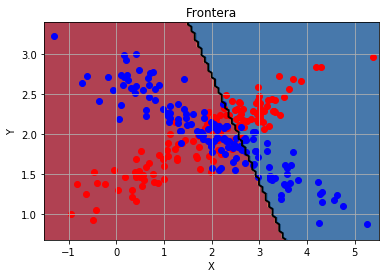

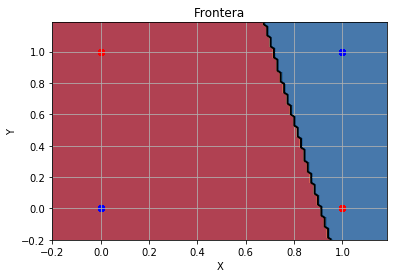

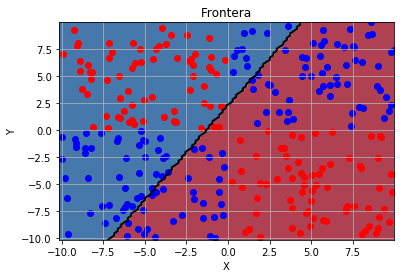

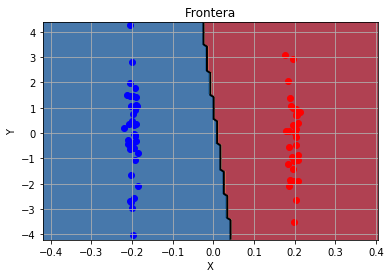

In [46]:
from clasificadores.clasificador_regresion_logistica import ClasificadorRegresionLogistica

clasificador = ClasificadorRegresionLogistica()

for i in range(1, 5):
    dataset=Datos('./conjunto_datos/example%d.data' % i)
    estrategia = ValidacionSimple()
    res = clasificador.validacion(estrategia, dataset)
    estrategia.creaParticiones(dataset.datos)
    ii = estrategia.particiones[-1].indicesTrain
    plt.figure()
    plotModel(dataset.datos[ii,0],dataset.datos[ii,1],dataset.datos
    [ii,-1]!=0,clasificador,"Frontera",dataset.diccionarios)
    print('Error de ./conjunto_datos/example%d.data: %s'% (i, clasificador.errores))



#### Implementación de scikit

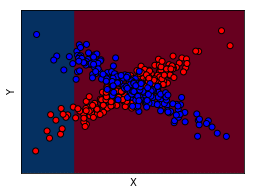

Validación simple. Error: 0.43


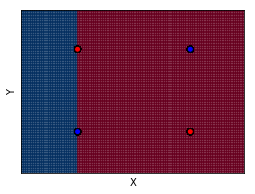

Validación simple. Error: 0.58


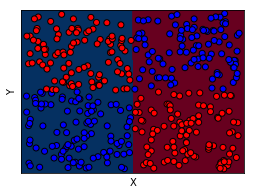

Validación simple. Error: 0.63


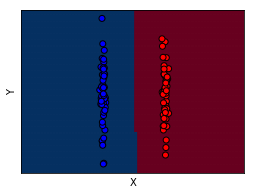

Validación simple. Error: 0.00


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ShuffleSplit
from matplotlib.colors import ListedColormap


for i in range(1, 5):
    dataset=Datos('./conjunto_datos/example%d.data' % i)
    estrategia = ValidacionSimple()
    X = dataset.datos[:,:-1]
    Y = dataset.datos[:,-1]

    Y = dataset.datos[:,-1] 
    class_names = sorted(dataset.diccionarios[-1].keys())
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=29)


    model = LogisticRegression(C=1e5)
    model.fit(X_train, Y_train)

    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.pcolormesh(xx, yy, Z, cmap=cm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=cm_bright)
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    print("Validación simple. Error: %0.2f" % (1-score))

#### Comentario sobre los resultados
Se observa como para los dataset 1, 2 y 3, como no se puede separar los conjuntos por una frontera lineal, el error es bastante alto y la frontera lineal es la máxima posible dada la limitación de la frontera lineal.